In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_loss: 0.6923

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


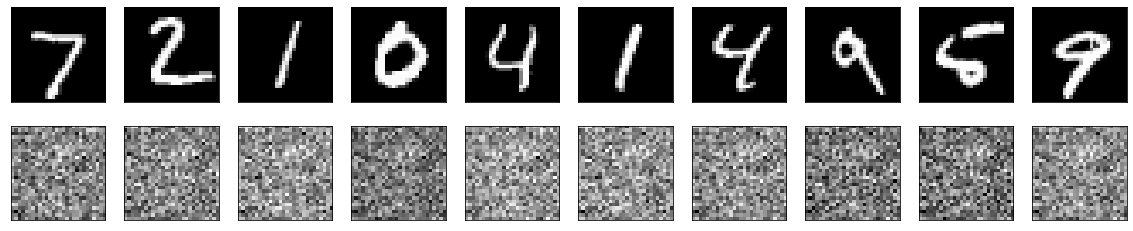

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder


In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_lo

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


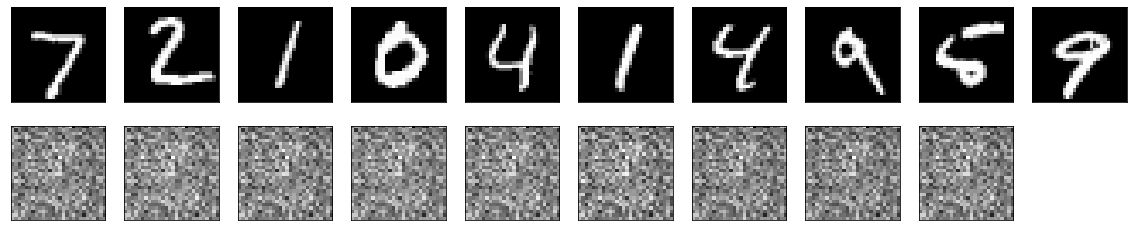

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolutional autoencoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 10s 7ms/step - loss: 0.6897 - val_loss: 0.6875
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6835 - val_loss: 0.6784
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6668 - val_loss: 0.6496
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6065 - val_loss: 0.5478
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5035 - val_loss: 0.4877
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4769 - val_loss: 0.4735
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.4623 - val_loss: 0.4579
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.4456 - val_loss: 0.4398
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.4269 - val_loss: 0.4202
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.4068 - val_loss: 0.3

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


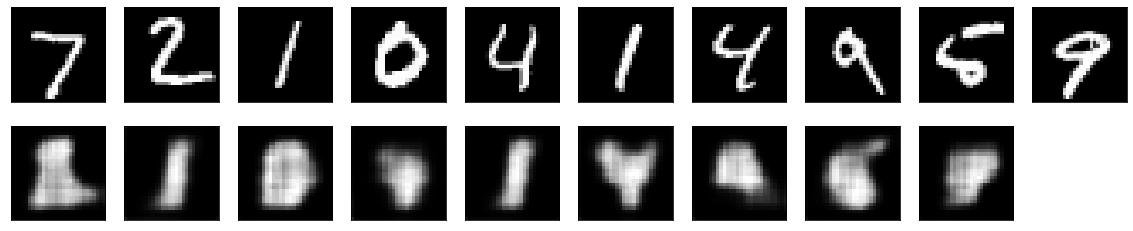

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Application to image denoising

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

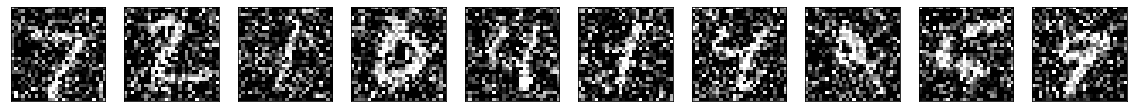

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.6364 - val_loss: 0.6174
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5908 - val_loss: 0.5647
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5395 - val_loss: 0.5235
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5119 - val_loss: 0.5086
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5007 - val_loss: 0.4995
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4915 - val_loss: 0.4900
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4818 - val_loss: 0.4798
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4711 - val_loss: 0.4683
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4588 - val_loss: 0.4549
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4444 - val_lo